In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
from cassandra.cluster import Cluster

In [121]:
! ls
data = np.load("CountryCases.npy", allow_pickle=True, encoding='bytes')
for d in data:
    print(d[-10:])

CountryCases.npy LSTM_Jon.ipynb   Stream_Service   id2221-frontend
LSTM.ipynb       Models           id2221-backend
[1537. 1684. 1600. 1527. 1209. 1274. 1637. 1380. 1545. 1696.]
[660. 660. 589. 629. 869. 871. 865. 862. 732. 847.]
[1. 0. 0. 2. 0. 1. 0. 1. 0. 0.]
[17. 11.  0.  0.  0.  0.  0. 85.  0.  5.]
[ 856.  912. 1277. 1299.  763.  867.  134.  692. 1510.  826.]
[3. 0. 8. 2. 0. 0. 2. 0. 0. 6.]
[2803.    0. 5766.    0. 2677. 3132. 3126. 2201. 3242. 5758.]
[   0. 2234.    0.    0. 5752.    0. 2185. 1723. 1442.    0.]
[ 7118. 11970. 13318. 15186.     0.     0. 37889. 13873. 16973. 20986.]
[ 399.  707.  745.  834.  899.  726.  537.  794. 1509. 1664.]
[15. 24. 17. 20. 24. 26. 14. 27. 25. 24.]
[1028. 1346. 1552. 1163. 1747. 1672. 1121. 1524. 1958. 2435.]
[11.  0.  9. 10.  0. 25.  5.  0. 23.  2.]
[ 0.  0.  0.  0.  0.  0. 26.  0.  0.  7.]
[0. 0. 0. 1. 0. 0. 0. 0. 2. 0.]
[1164.  836.  855. 1169.    0.  945. 1159.  957.  719.  995.]
[2621. 1848. 1701. 1695.  874.  339. 1767. 1286. 1173.  912.]


In [126]:
X = np.zeros((36124, 1, 14))
Y = np.zeros((36124, 1, 1))

index = 0

for i, country in enumerate(data):
    for j in range(len(country) - 14):
        X[index] = country[j:j+14]
        Y[index] = country[j+14]
        index +=1
        
print(index)
print(X.shape, Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

36124
(36124, 1, 14) (36124, 1, 1)
(27093, 1, 14) (9031, 1, 14) (27093, 1, 1) (9031, 1, 1)


In [127]:
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model, Sequential

tf.keras.backend.clear_session()

In [128]:
# Model_1 ~ ??? mse
model = Sequential()
model.add(LSTM(50, input_shape=(1, 14), return_sequences=True, stateful=False))
model.add(LSTM(50, input_shape=(1, 50), return_sequences=True, stateful=False))
model.add(LSTM(50, input_shape=(1, 50), return_sequences=False, stateful=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
NUM_EPOCHS = 1000

result = model.fit(x_train, y_train, batch_size = 1, validation_data = (x_test, y_test), verbose = 1, epochs = NUM_EPOCHS, callbacks=[callback])

Epoch 1/1000
27093/27093 [==============================] - 147s 5ms/step - loss: 1532360960.0000 - val_loss: 22895848.0000
Epoch 2/1000
27093/27093 [==============================] - 128s 5ms/step - loss: 1532093824.0000 - val_loss: 22727332.0000
Epoch 3/1000
27093/27093 [==============================] - 178s 7ms/step - loss: 1532242560.0000 - val_loss: 23123372.0000
Epoch 4/1000
27093/27093 [==============================] - 143s 5ms/step - loss: 1532505088.0000 - val_loss: 23117524.0000
Epoch 5/1000
27093/27093 [==============================] - 151s 6ms/step - loss: 1532523264.0000 - val_loss: 23110570.0000
Epoch 6/1000
27093/27093 [==============================] - 139s 5ms/step - loss: 1532463232.0000 - val_loss: 23104334.0000
Epoch 7/1000
27093/27093 [==============================] - 159s 6ms/step - loss: 1532499072.0000 - val_loss: 23098610.0000
Epoch 8/1000
27093/27093 [==============================] - 147s 5ms/step - loss: 1532354944.0000 - val_loss: 22628926.0000
Epoch 9/

KeyboardInterrupt: 

In [72]:
model.save("Models/model_1/model_1")
model.save_weights('Models/model_1_weights/model_1_weights')  

INFO:tensorflow:Assets written to: Models/model_1/model_1/assets


In [ ]:
# Model_2 ~ ??? mse
'''
model = Sequential()
model.add(LSTM(50, input_shape=(1, 14), return_sequences=True, stateful=False))
model.add(LSTM(50, input_shape=(1, 50), return_sequences=True, stateful=False))
model.add(LSTM(50, input_shape=(1, 50), return_sequences=False, stateful=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
NUM_EPOCHS = 1000

result = model.fit(x_train, y_train, batch_size = 1, validation_data = (x_test, y_test), verbose = 1, epochs = NUM_EPOCHS, callbacks=[callback])
'''



In [ ]:
model.save_weights('model_2') 

In [110]:
plotData = data[30]
x = plotData[-28:-14].reshape(1, 1, 14)

y_pred = np.zeros((14))

for i in range(14):
    print(x[0, 0])
    print()
    pred = int(model.predict(x)[0, 0])
    y_pred[i] = pred
    x = np.delete(x, 0, 2)
    x = np.insert(x, 13, pred, 2)
    print("pred", pred)
    print()
    

[ 49.  40.  22.  40.  32.  33.  41.  40.  63.  49.  59. 101.  91.  95.]

pred 106

[ 40.  22.  40.  32.  33.  41.  40.  63.  49.  59. 101.  91.  95. 106.]

pred 87

[ 22.  40.  32.  33.  41.  40.  63.  49.  59. 101.  91.  95. 106.  87.]

pred 65

[ 40.  32.  33.  41.  40.  63.  49.  59. 101.  91.  95. 106.  87.  65.]

pred 56

[ 32.  33.  41.  40.  63.  49.  59. 101.  91.  95. 106.  87.  65.  56.]

pred 86

[ 33.  41.  40.  63.  49.  59. 101.  91.  95. 106.  87.  65.  56.  86.]

pred 89

[ 41.  40.  63.  49.  59. 101.  91.  95. 106.  87.  65.  56.  86.  89.]

pred 80

[ 40.  63.  49.  59. 101.  91.  95. 106.  87.  65.  56.  86.  89.  80.]

pred 92

[ 63.  49.  59. 101.  91.  95. 106.  87.  65.  56.  86.  89.  80.  92.]

pred 69

[ 49.  59. 101.  91.  95. 106.  87.  65.  56.  86.  89.  80.  92.  69.]

pred 57

[ 59. 101.  91.  95. 106.  87.  65.  56.  86.  89.  80.  92.  69.  57.]

pred 46

[101.  91.  95. 106.  87.  65.  56.  86.  89.  80.  92.  69.  57.  46.]

pred 92

[ 91.  95. 106.

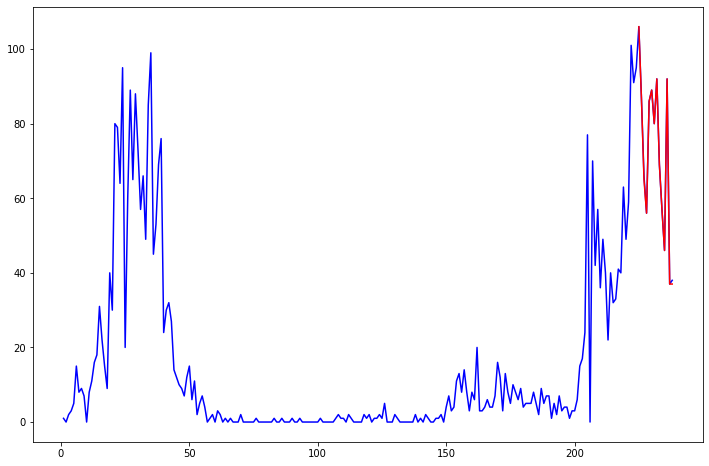

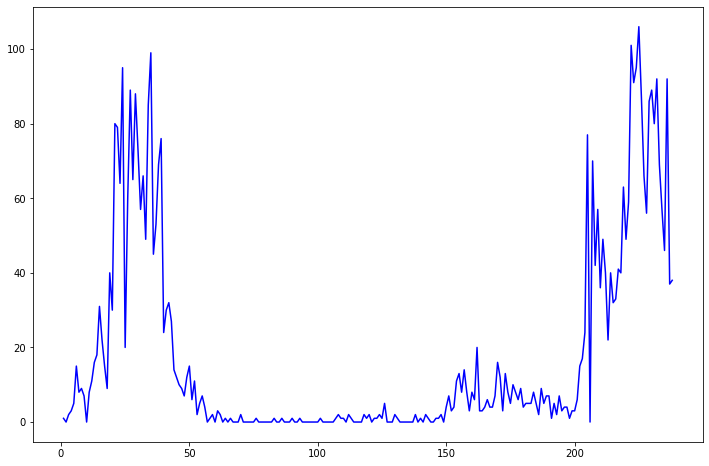

In [112]:
length = len(plotData)

xAx = np.arange(1, length+1)
xAx2 = np.arange(length-13, length+1)
plt.figure(figsize=((12, 8)))
plt.plot(xAx, plotData, color='blue')
plt.plot(xAx2, y_pred, color='red')
plt.show()

plt.figure(figsize=((12, 8)))
plt.plot(xAx, plotData, color='blue')
plt.show()